In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('water.csv')
df.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


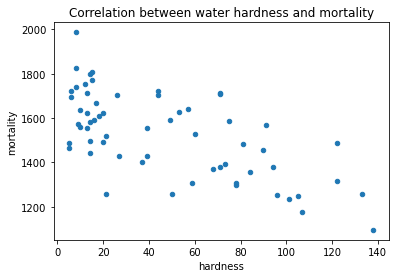

In [5]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between water hardness and mortality')
plt.show()

In [6]:
df[['hardness', 'mortality']].corr() #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
df[['hardness', 'mortality']].corr(method='spearman') #коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Величина коэффициентов корреляции для величин более 0,6, что может указыват на наличии заметной (по шкале Чеддока) обратной зависимости. Построим модель линейной регрессии 

In [71]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [75]:
#значения коэффициентов линейной регрессии
print(model.coef_[0])
print(model.intercept_)

-3.656720169485439
1688.066270653473


In [21]:
model.score(X_test, y_test)  #значение коэффициента детерминации

0.30602504827717636

Text(0.5, 1.0, 'Linear regression')

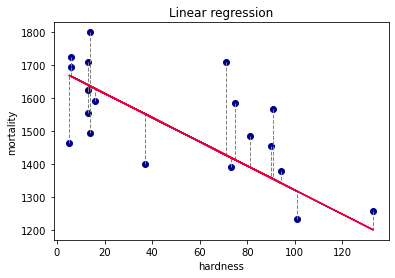

In [22]:
#строим график остатков
plt.scatter(X_test, y_test, color = 'darkblue')
plt.plot(X_test, y_pred, c='#e60040')
plt.vlines(X_test, y_test, y_pred, linestyle = '--',
        linewidth = 1, color = '0.5')

plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Linear regression')
       

In [41]:
#создадим датафреймы для юга и севера
df_south = df[(df['location']=='South')]
df_north = df[(df['location']=='North')]

In [24]:
df_north.head(5)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


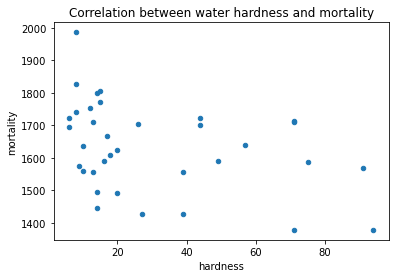

In [25]:
df_north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between water hardness and mortality')
plt.show()

In [26]:
df_north[['hardness', 'mortality']].corr() #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [27]:
df_north[['hardness', 'mortality']].corr(method='spearman') #коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Судя по коэффициенту корреляции может существовать некая слабая обратная зависимость. Построим подель линейной регрессии

In [70]:
X1 = df_north[['hardness']]
y1 = df_north['mortality']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1)
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [74]:
#значения коэффициентов линейной регрессии
print(model.coef_[0])
print(model.intercept_)

-3.656720169485439
1688.066270653473


In [35]:
model.score(X1_test, y1_test) #величина коэфициента детерминации близка к 0, построенная модель не удовлетворительно описывает зависимость величин, или же величины не имеют корреляции

0.018885304285745863

Text(0.5, 1.0, 'Linear regression')

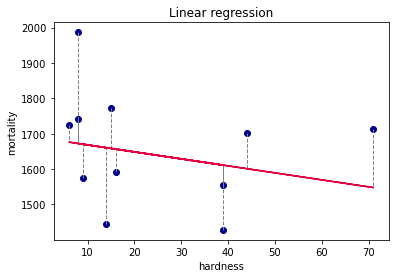

In [36]:
#строим график остатков
plt.scatter(X1_test, y1_test, color = 'darkblue')
plt.plot(X1_test, y1_pred, c='#e60040')
plt.vlines(X1_test, y1_test, y1_pred, linestyle = '--',
        linewidth = 1, color = '0.5')

plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Linear regression')

In [43]:
df_south.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


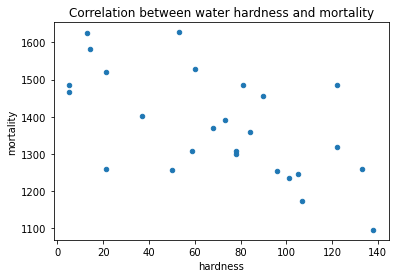

In [44]:
df_south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between water hardness and mortality')
plt.show()

In [45]:
df_south[['hardness', 'mortality']].corr() #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [46]:
df_south[['hardness', 'mortality']].corr(method='spearman') #коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Судя по коэффициенту корреляции может существовать некая заметная обратная зависимость. Построим подель линейной регрессии

In [64]:
X2 = df_south[['hardness']]
y2 = df_south['mortality']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)

In [77]:
#значения коэффициентов линейной регрессии
print(model.coef_[0])
print(model.intercept_)

-3.656720169485439
1688.066270653473


In [67]:
model.score(X2_test, y2_test) #величина коэфициента детерминации отрицательная, модель не адекватна

-2.5519223012352077

Text(0.5, 1.0, 'Linear regression')

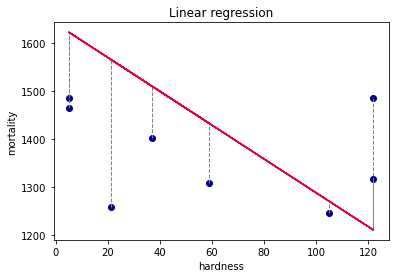

In [78]:
#строим график остатков
plt.scatter(X2_test, y2_test, color = 'darkblue')
plt.plot(X2_test, y2_pred, c='#e60040')
plt.vlines(X2_test, y2_test, y2_pred, linestyle = '--',
        linewidth = 1, color = '0.5')

plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Linear regression')
#остатки неравномерны относительно линии регрессии, модель некорректна. Вероятно зависимости между величинами нет.